In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
links = pd.read_csv('ml-latest-small/links.csv', header = 0)
print(links.shape)
links.head(5)

(9742, 3)


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [44]:
movies = pd.read_csv('ml-latest-small/movies.csv', header = 0)
print(movies.shape)
print(movies['movieId'].nunique())
movies.head(5)

(9742, 3)
9742


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [45]:
ratings = pd.read_csv('ml-latest-small/ratings.csv', header = 0, 
                      usecols = ['userId', 'movieId', 'rating'])
print(ratings.shape)
print(ratings['userId'].nunique())
print(ratings['movieId'].nunique())
ratings.head(5)

(100836, 3)
610
9724


,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [46]:
tags = pd.read_csv('ml-latest-small/tags.csv', header = 0, 
                   usecols = ['userId', 'movieId', 'tag'])
print(tags.shape)
print(tags['userId'].nunique())
print(tags['movieId'].nunique())
tags.head(5)

(3683, 3)
58
1572


,userId,movieId,tag
0,2,60756,funny
1,2,60756,Highly quotable
2,2,60756,will ferrell
3,2,89774,Boxing story
4,2,89774,MMA


### Ratings

In [47]:
print(ratings['rating'].describe())
print(ratings['rating'].isnull().sum())
print(sorted(ratings['rating'].unique()))

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64
0
[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


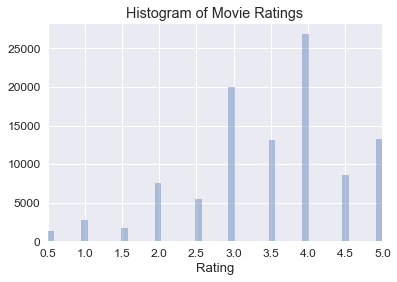

In [48]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale = 1.2)
%matplotlib inline

# distribution of ratings
sns.distplot(a = ratings['rating'], kde = False)
plt.title('Histogram of Movie Ratings')
plt.xlabel('Rating')
plt.axis(xmin = 0.5, xmax = 5)
plt.savefig('hist.png')

### Simple Recommender
##### Find top-rated movies based on the average user ratings

- generalized recommendations (no personalized recommendations based on the user)
- sort by the average user ratings
- minimum number of user ratings required (at least 50 ratings for each movie)

In [49]:
df = pd.merge(movies, ratings, on = 'movieId')
print(df.shape)
df.head(5)

(100836, 5)


,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5


In [50]:
## top-rated movies based on the average user ratings 
avg_rating = df.groupby('movieId')['rating'].agg(['mean', 'count'])
avg_rating.head(5)

,mean,count
movieId,,
1,3.920930,215
2,3.431818,110
3,3.259615,52
4,2.357143,7
5,3.071429,49


In [51]:
avg_rating_qualified = avg_rating[avg_rating['count'] >= 50]
avg_rating_qualified.head(5)

,mean,count
movieId,,
1,3.920930,215
2,3.431818,110
3,3.259615,52
6,3.946078,102
7,3.185185,54


In [52]:
avg_rating_qualified.sort_values(by = 'mean', ascending = False, inplace = True)
avg_rating_qualified.head(5)

,mean,count
movieId,,
318,4.429022,317
858,4.289062,192
2959,4.272936,218
1276,4.271930,57
750,4.268041,97


In [53]:
def simple_recommender(num):
    '''Returns the specified number of top-rated movies 
       in the database.'''
    top_id = avg_rating_qualified.head(num)
    top = movies.loc[movies['movieId'].isin(top_id.index)]
    return top

Without considering any personal perferences, our simple movie recommender recommends the most famous movies such as "The Shawshank Redemption" and "The Godfather".

In [54]:
simple_recommender(15)

,movieId,title,genres
46,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
277,318,"Shawshank Redemption, The (1994)",Crime|Drama
461,527,Schindler's List (1993),Drama|War
602,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War
659,858,"Godfather, The (1972)",Crime|Drama
686,904,Rear Window (1954),Mystery|Thriller
694,912,Casablanca (1942),Drama|Romance
899,1197,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance
914,1213,Goodfellas (1990),Crime|Drama


#### Q: How to find top-rated movies with multiple genres?

### Genres

- pipe-separated
- How many unique genres are there?
- What are the most popular genres?
- Visualization: word cloud

In [55]:
genre_labels = set()
for s in movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

genre_labels

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [56]:
## Initialize the count dictionary
genre_counts = {}
for label in genre_labels:
    genre_counts[label] = 0

for ls in movies['genres'].str.split('|').values:
    for g in ls:
        genre_counts[g] += 1

genre_counts

{'(no genres listed)': 34,
 'Action': 1828,
 'Adventure': 1263,
 'Animation': 611,
 'Children': 664,
 'Comedy': 3756,
 'Crime': 1199,
 'Documentary': 440,
 'Drama': 4361,
 'Fantasy': 779,
 'Film-Noir': 87,
 'Horror': 978,
 'IMAX': 158,
 'Musical': 334,
 'Mystery': 573,
 'Romance': 1596,
 'Sci-Fi': 980,
 'Thriller': 1894,
 'War': 382,
 'Western': 167}

[Reference(for sorting a dictionary by value)](https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value)

In [57]:
for g in sorted(genre_counts, key = genre_counts.get, reverse = True):
    print(g, genre_counts[g])

Drama 4361
Comedy 3756
Thriller 1894
Action 1828
Romance 1596
Adventure 1263
Crime 1199
Sci-Fi 980
Horror 978
Fantasy 779
Children 664
Animation 611
Mystery 573
Documentary 440
War 382
Musical 334
Western 167
IMAX 158
Film-Noir 87
(no genres listed) 34


### The most popular genres are Drama, Comedy, Thriller, Romance, and Action.

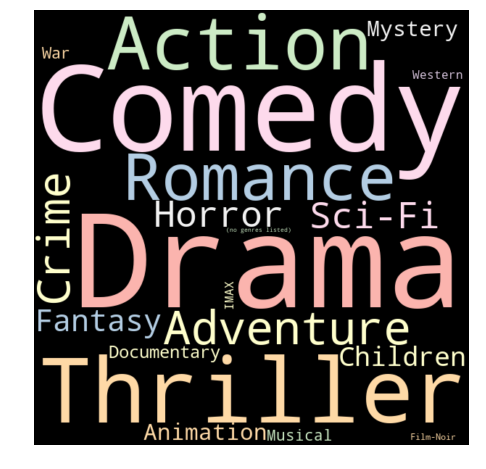

In [58]:
## Visualization 
## (check colormap)
import wordcloud
from wordcloud import WordCloud

wordcloud = WordCloud(width = 600, height = 600, colormap = 'Pastel1').generate_from_frequencies(genre_counts)
f, ax = plt.subplots(figsize = (8, 8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.savefig('genre_wordcloud.png')

### Content-based Recommender

- genre-based

In [59]:
movies['genres'] = movies['genres'].str.split('|').values

print(movies['genres'][0]) # a list of strings
print(' '.join(movies['genres'][0]))

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']
Adventure Animation Children Comedy Fantasy


In [60]:
def transform_genre(ls_genre):
    return ' '.join(ls_genre)

In [61]:
movies['genres'] = movies['genres'].apply(transform_genre)
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy


In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer = 'word', ngram_range = (1, 2))
tfidf_matrix = tfidf.fit_transform(movies['genres'])
tfidf_matrix.shape

(9742, 179)

In [63]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim[:4, :4]

array([[1.        , 0.31379419, 0.0611029 , 0.05271111],
       [0.31379419, 1.        , 0.        , 0.        ],
       [0.0611029 , 0.        , 1.        , 0.35172407],
       [0.05271111, 0.        , 0.35172407, 1.        ]])

In [64]:
titles = movies['title']
indices = pd.Series(movies.index, index = movies['title'])
indices[:10]

title
Toy Story (1995)                      0
Jumanji (1995)                        1
Grumpier Old Men (1995)               2
Waiting to Exhale (1995)              3
Father of the Bride Part II (1995)    4
Heat (1995)                           5
Sabrina (1995)                        6
Tom and Huck (1995)                   7
Sudden Death (1995)                   8
GoldenEye (1995)                      9
dtype: int64

In [65]:
def genre_recommender(title, num):
    '''Returns movie recommendations based on the cosine similarity score 
       of the movie genre; the number of recommendations returned is specified by the user.'''
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    # start from 1 rather than 0 since the best score is always from the given movie itself
    sim_scores = sim_scores[1:num+1]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [66]:
genre_recommender('Fight Club (1999)', 5)

254     Léon: The Professional (a.k.a. The Professiona...
307                       Clear and Present Danger (1994)
758                              Last Man Standing (1996)
919             Killer, The (Die xue shuang xiong) (1989)
1181                                      Face/Off (1997)
Name: title, dtype: object

One of the disadvantages of `genre_recommender` is that the recommender is very likely to recommend the same input movie to the user. The relatively simple recommender only considers the similarity of movie genres and it is quite often that the two movies have the same genre or the same combination of genres. Therefore, we may end up having many similarity scores of 1 in the matrix for a given movie. Even if we start counting the most similar movies from 1 instead of 0 (see the code and the comments above), we might still get the same input movie from the recommendation list. Below is an example:

In [67]:
genre_recommender('Saving Private Ryan (1998)', 5)

909                     Apocalypse Now (1979)
933              Boot, Das (Boat, The) (1981)
1407    All Quiet on the Western Front (1930)
1503               Saving Private Ryan (1998)
1826                Thin Red Line, The (1998)
Name: title, dtype: object

# Memory-based Recommender

### User-Movie Matrix

In [171]:
um = pd.pivot_table(ratings, values='rating', index='userId', columns='movieId')
um.fillna(0, inplace=True)
print(um.shape)
um.head()

(610, 9724)


movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [173]:
sparsity = ratings.shape[0]/um.size
print('Sparsity: {:.2f}%'.format(sparsity*100)) ## 1.7% of the user-movie ratings have a value.

Sparsity: 1.70%


### Train-Test Split

In [174]:
train_um = um.values.copy()
test_um = np.zeros(um.shape)

for user in range(um.shape[0]):
    test_rating = np.random.choice(um.values[user, :].nonzero()[0], size=10, replace=False)
    train_um[user, test_rating] = 0
    test_um[user, test_rating] = um.values[user, test_rating]
    
print(test_um.shape)
print(train_um.shape)

(610, 9724)
(610, 9724)


In [175]:
assert(np.all((train_um * test_um) == 0)) ## test train and test are disjoint

### Cosine Similarity

In [176]:
def similarity(user_item, kind='user', epsilon=1e-9):
    # epsilon -> small number for handling dived-by-zero errors
    if kind == 'user':
        sim = user_item.dot(user_item.T) + epsilon
    elif kind == 'item':
        sim = user_item.T.dot(user_item) + epsilon
    norms = np.array([np.sqrt(np.diagonal(sim))])
    return (sim / norms / norms.T)

In [177]:
user_sim = similarity(train_um, kind='user')
item_sim = similarity(train_um, kind='item')

In [178]:
print(user_sim.shape)
print(item_sim.shape)

(610, 610)
(9724, 9724)


In [181]:
from sklearn.metrics.pairwise import pairwise_distances

In [182]:
user_sim = 1-pairwise_distances(train_um, metric='cosine')
item_sim = 1-pairwise_distances(train_um.T, metric='cosine')

In [183]:
print(user_sim.shape)
print(item_sim.shape)

(610, 610)
(9724, 9724)


In [184]:
def predict(user_item, similarity, kind='user'):
    if kind == 'user':
        return similarity.dot(user_item) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif kind == 'item':
        return user_item.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])

In [185]:
user_pred = predict(train_um, user_sim, kind='user')
item_pred = predict(train_um, item_sim, kind='item')

### Recommendations

In [187]:
def recommend_movies(prediction, userid, rating, n_recom):
    
    # Get and sort the user's predictions
    pred = pd.DataFrame(prediction, index=um.index)
    pred_sort = pred.loc[userid].sort_values(ascending=False)
    pred_sort.rename('prediction', inplace=True)
    
    user_data = rating[rating.userId == userid]
    user_data = user_data.merge(movies, how = 'left', on = 'movieId').sort_values(['rating'], ascending=False)
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    notsee = movies[~movies['movieId'].isin(user_data['movieId'])]
    notsee = notsee.merge(pd.DataFrame(pred_sort), how='left', left_on='movieId', right_index=True)
    notsee = notsee.sort_values('prediction', ascending=False)
    recommendation = notsee.iloc[:n_recom, :-1]
    
    return recommendation

In [188]:
user_sim = similarity(train_um, kind='user')
user_pred = predict(train_um, user_sim, kind='user')
recommend_movies(user_pred, 610, ratings, 5)

,movieId,title,genres
273,314,"Secret of Roan Inish, The (1994)",Children Drama Fantasy Mystery
239,277,Miracle on 34th Street (1994),Drama
221,257,Just Cause (1995),Mystery Thriller
1416,1938,"Lost Weekend, The (1945)",Drama
191,224,Don Juan DeMarco (1995),Comedy Drama Romance


In [189]:
user_sim = similarity(um.values, kind='user')
user_pred = predict(um.values, user_sim, kind='user')
recommend_movies(user_pred, 610, ratings, 5)

,movieId,title,genres
1416,1938,"Lost Weekend, The (1945)",Drama
239,277,Miracle on 34th Street (1994),Drama
273,314,"Secret of Roan Inish, The (1994)",Children Drama Fantasy Mystery
221,257,Just Cause (1995),Mystery Thriller
191,224,Don Juan DeMarco (1995),Comedy Drama Romance


In [190]:
recommend_movies(item_pred, 610, ratings, 5)

,movieId,title,genres
4152,5974,"Thief of Bagdad, The (1940)",Adventure Fantasy
4523,6705,Party Monster (2003),Comedy Crime Drama Thriller
3996,5637,Flirting (1991),Drama
4621,6884,Veronica Guerin (2003),Crime Drama Thriller
5198,8462,Executive Suite (1954),Drama


### Evaluation: RMSE

In [ ]:
from sklearn.metrics import mean_squared_error

In [191]:
def get_rmse(pred, act):
    # Ignore nonzero terms.
    pred = pred[act.nonzero()].flatten()
    act = act[act.nonzero()].flatten()
    rmse = mean_squared_error(pred, act)**0.5
    return rmse

In [192]:
print('User-based RMSE: ', get_rmse(user_pred, test_um))
print('Item-based RMSE: ', get_rmse(item_pred, test_um))

User-based RMSE:  2.9962609380514533
Item-based RMSE:  3.7059838416669204


# Model-Based Recommender

### Matrix Factorization

In [218]:
import time
#class of Matrix Factorization method
class MF():
    
    # Initializing the user-movie rating matrix R, no. of latent features K, step size alpha and regularization strength beta.
    def __init__(self, R, test, K, alpha, beta, iterations):
        self.R = R    
        self.test = test
        self.num_users, self.num_items = R.shape
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations

    # Initializing user-feature and movie-feature matrix 
    def train(self):
        self.P = np.random.normal(scale=1./self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1./self.K, size=(self.num_items, self.K))

        # Initializing the bias terms
        self.b_u = np.zeros(self.num_users)
        self.b_i = np.zeros(self.num_items)
        self.b = np.mean(self.R[np.where(self.R != 0)])

        # List of training samples
        self.samples = [
        (i, j, self.R[i, j])
        for i in range(self.num_users)
        for j in range(self.num_items)
        if self.R[i, j] > 0
        ]

        # Stochastic gradient descent for given number of iterations
        training_process = []
        since = time.time()
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.sgd()
            mse = self.mse()
            rmse = self.rmse()
            training_process.append((i, mse, rmse))
            if (i+1) % 20 == 0:
                time_elapsed = time.time() - since
                print("Iteration: %d ; error = %.4f, Time = %.4f" % (i+1, mse, time_elapsed))
                since = time.time()
                
        return training_process

    # Computing total mean squared error
    def mse(self):
        xs, ys = self.R.nonzero()
        predicted = self.full_matrix()
        error = 0
        sample = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
            sample = sample + 1
        return error/sample
    
    # Computing RMSE on the test dataset
    def rmse(self):
        # Ignore nonzero terms.
        pred = self.full_matrix()[self.test.nonzero()].flatten()
        act = self.test[self.test.nonzero()].flatten()
        rmse = mean_squared_error(pred, act)**0.5
        return rmse
    
    # Stochastic gradient descent to get optimized P and Q matrix
    def sgd(self):
        for i, j, r in self.samples:
            prediction = self.get_rating(i, j)
            e = (r - prediction)

            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_i[j] += self.alpha * (e - self.beta * self.b_i[j])

            self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (e * self.P[i, :] - self.beta * self.Q[j,:])

    # Ratings for user i and moive j
    def get_rating(self, i, j):
        prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction

    # Full user-movie rating matrix
    def full_matrix(self):
        return mf.b + mf.b_u[:,np.newaxis] + mf.b_i[np.newaxis:,] + mf.P.dot(mf.Q.T)

In [223]:
Ks = [20,40,60,80,100]
rmses = np.zeros(len(Ks))
for i in range(len(Ks)):
    mf = MF(train_um, test_um, K=Ks[i], alpha=0.001, beta=0.01, iterations=300)
    training_process = mf.train()
    rmses[i]= min([x[2] for x in training_process])
    min_iteration = np.argmin([x[2] for x in training_process])
    print(rmses[i])
    print(min_iteration)

Iteration: 20 ; error = 0.7525, Time = 32.6263
Iteration: 40 ; error = 0.7119, Time = 32.4830
Iteration: 60 ; error = 0.6833, Time = 32.7036
Iteration: 80 ; error = 0.6504, Time = 32.9352
Iteration: 100 ; error = 0.6034, Time = 33.3514
Iteration: 120 ; error = 0.5441, Time = 32.9912
Iteration: 140 ; error = 0.4837, Time = 32.8230
Iteration: 160 ; error = 0.4300, Time = 32.9742
Iteration: 180 ; error = 0.3851, Time = 32.8894
Iteration: 200 ; error = 0.3483, Time = 32.9339
Iteration: 220 ; error = 0.3182, Time = 32.9404
Iteration: 240 ; error = 0.2936, Time = 32.7356
Iteration: 260 ; error = 0.2732, Time = 32.7825
Iteration: 280 ; error = 0.2562, Time = 32.8605
Iteration: 300 ; error = 0.2419, Time = 32.5666
0.9186931355512477
181
Iteration: 20 ; error = 0.7539, Time = 32.3398
Iteration: 40 ; error = 0.7153, Time = 32.6030
Iteration: 60 ; error = 0.6905, Time = 32.6555
Iteration: 80 ; error = 0.6645, Time = 32.7915
Iteration: 100 ; error = 0.6259, Time = 32.5134
Iteration: 120 ; error = 

When the dimension of the latent factor is 100, matrix factorization method achieves its best performance of RMSE of 0.9020.

### Recommendations

In [228]:
recommend_movies(mf.full_matrix(), 610, ratings, 5)

,movieId,title,genres
412,474,In the Line of Fire (1993),Action Thriller
681,899,Singin' in the Rain (1952),Comedy Musical Romance
4320,6313,Sibling Rivalry (1990),Comedy
813,1066,Shall We Dance (1937),Comedy Musical Romance
191,224,Don Juan DeMarco (1995),Comedy Drama Romance


### Model-based Recommender
#### using `scikit-surprise`

- Algorithm: SVD
- 5-fold cross-validation
- Train-test split
- Cross-validation iterators
- Tuning parameters with `GridSearchCV`

In [28]:
from surprise import Reader, Dataset

ratings_dict = {'itemID': list(ratings.movieId),
                'userID': list(ratings.userId),
                'rating': list(ratings.rating)}
df = pd.DataFrame(ratings_dict)

df.head(5)

,itemID,userID,rating
0,1,1,4.0
1,3,1,4.0
2,6,1,4.0
3,47,1,5.0
4,50,1,5.0


In [29]:
reader = Reader(rating_scale = (0.5, 5.0))
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)

data

#### 5-fold cross-validation

In [30]:
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate

algo = SVD()
cross_validate(algo, data, measures = ['RMSE'], cv = 5, verbose = True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8867  0.8686  0.8679  0.8703  0.8757  0.8738  0.0070  
Fit time          4.93    4.85    4.81    4.81    5.10    4.90    0.11    
Test time         0.13    0.11    0.18    0.18    0.13    0.14    0.03    


{'test_rmse': array([0.88667469, 0.86860797, 0.86785044, 0.8702892 , 0.87566386]),
 'fit_time': (4.926001071929932,
  4.850584030151367,
  4.807585954666138,
  4.814482927322388,
  5.09716010093689),
 'test_time': (0.12903928756713867,
  0.1128089427947998,
  0.17531204223632812,
  0.1767442226409912,
  0.12913298606872559)}

#### Train-test split
- Train: 75%; Test: 25%

In [31]:
train, test = train_test_split(data, test_size = 0.25)

algo = SVD()

algo.fit(train)
predictions = algo.test(test)

accuracy.rmse(predictions)

RMSE: 0.8763


0.8762787834476016

#### `predict()` method

In [32]:
ratings.loc[(ratings['movieId'] == 2959) & (ratings['userId'] == 552)]

,userId,movieId,rating
85039,552,2959,4.5


In [33]:
uid = str(552)  
iid = str(2959) 

pred = algo.predict(uid, iid, r_ui = 4.5, verbose = True)

user: 552        item: 2959       r_ui = 4.50   est = 3.50   {'was_impossible': False}


#### Cross-validation iterators

In [34]:
from surprise.model_selection import KFold

kfold = KFold(n_splits = 5)
algo = SVD()
for train, test in kfold.split(data):
    algo.fit(train)
    predictions = algo.test(test)
    accuracy.rmse(predictions, verbose = True)

RMSE: 0.8683
RMSE: 0.8761
RMSE: 0.8740
RMSE: 0.8682
RMSE: 0.8777


####  Tuning parameters

- 3-fold cross validation
- computationally expensive

In [35]:
from surprise.model_selection import GridSearchCV
param_grid = {'n_epochs': [5, 10, 15, 20], 'lr_all': [0.002, 0.005],
              'reg_all': [0.02, 0.04, 0.06]}
svd_gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3)
svd_gs.fit(data)

In [ ]:
print(svd_gs.best_score['rmse'])
print(svd_gs.best_params['rmse'])

The default parameter values work well.  
`n_epochs` (the number of iteration of the SGD procedure): 20  
`lr_all` (the learning rate for all parameters): 0.005  
`reg_all` (the regularization term for all parameters): 0.02